In [1]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Load Data
data = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#information on features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
#Dropping Irrelevant Column
to_drop = ["CustomerID"]
data = data.drop(to_drop, axis=1)

#creating a column changin gender to 1 and 0
data["Male"] = data["Gender"].replace({"Male": 1, "Female": 0})

In [5]:
# Data Information
data.describe()

,Age,Annual Income (k$),Spending Score (1-100),Male
count,200.000000,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000,0.440000
std,13.969007,26.264721,25.823522,0.497633
min,18.000000,15.000000,1.000000,0.000000
25%,28.750000,41.500000,34.750000,0.000000
50%,36.000000,61.500000,50.000000,0.000000
75%,49.000000,78.000000,73.000000,1.000000
max,70.000000,137.000000,99.000000,1.000000


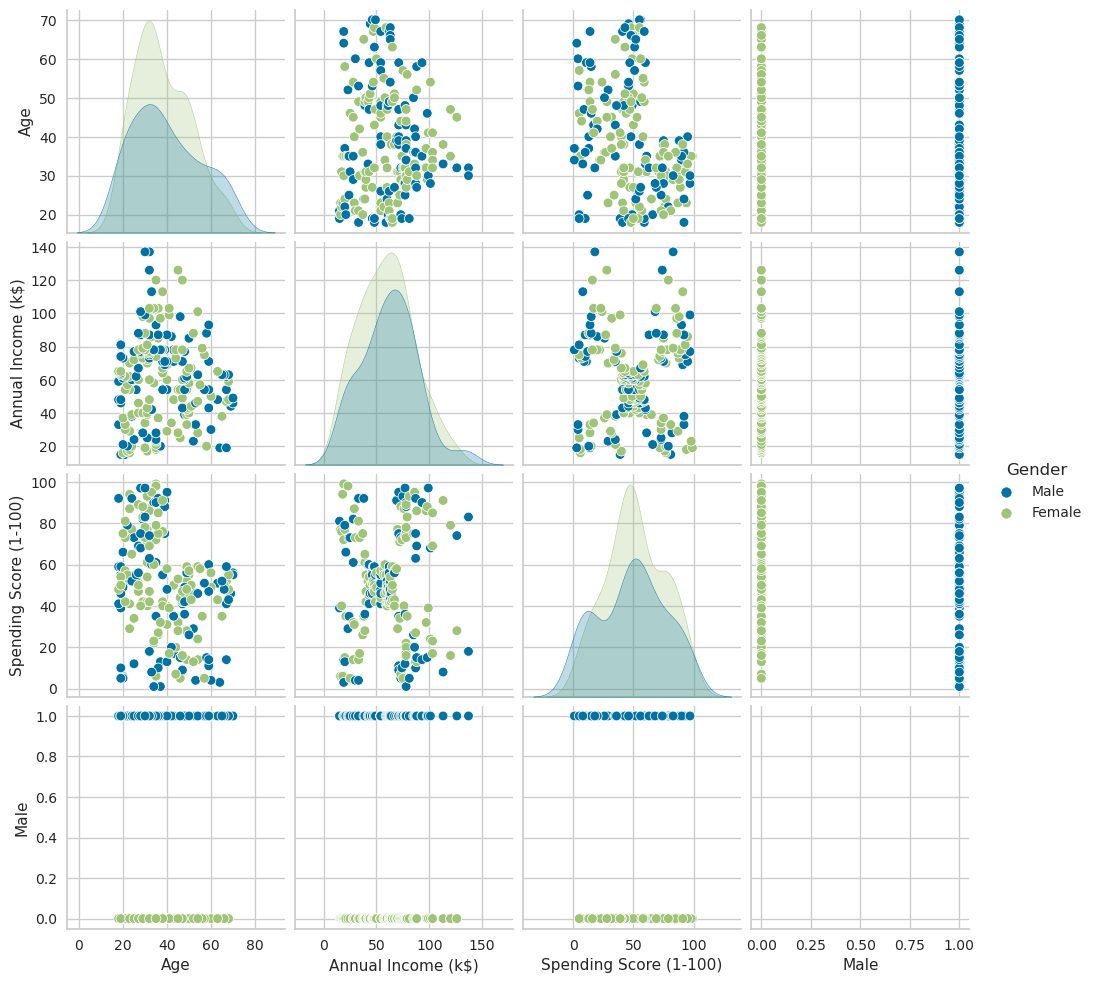

In [6]:
#check outliners and other problems
sns.pairplot(data, hue="Gender")
plt.show()

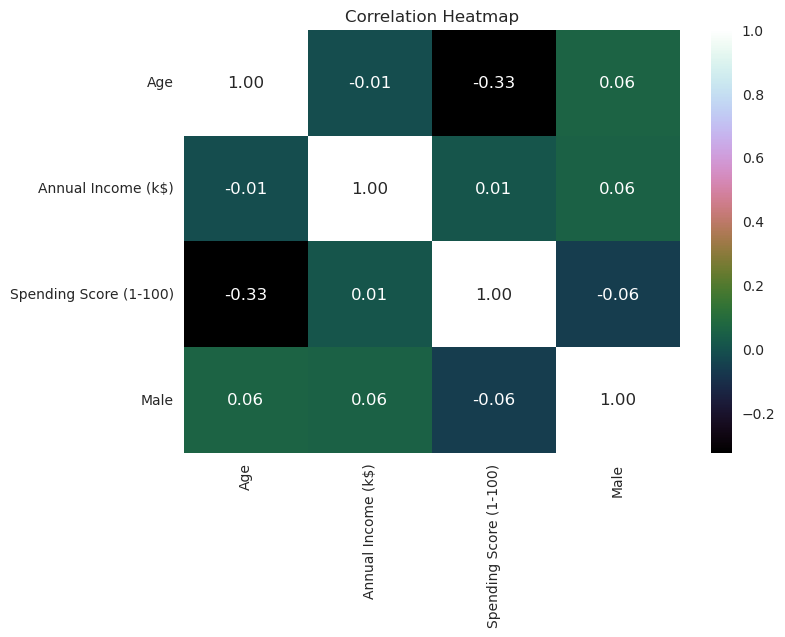

In [7]:
#Creating a Correlation heatmap
correlation_matrix = data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="cubehelix", fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
#creating a copy of data
ds = data.copy()

#Drop Gender in ds
drop_gender = ["Gender"]
ds =ds.drop(drop_gender, axis=1)

#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns = ds.columns)
scaled_ds.head()

,Age,Annual Income (k$),Spending Score (1-100),Male
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


In [9]:
#Dimension Reduction
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,200.0,-6.217249e-17,1.163776,-2.148322,-1.001755,0.021823,1.049600,2.774286
col2,200.0,1.421085e-16,1.026888,-2.023945,-0.786106,-0.045110,0.719534,3.137256
col3,200.0,7.105427e-17,0.967006,-2.277644,-0.714601,0.013056,0.720284,2.438084


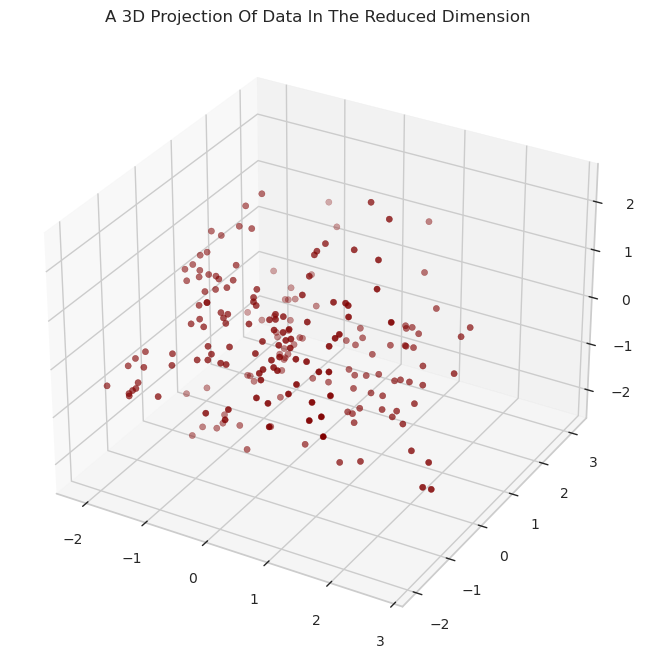

In [10]:
#A 3D Projection of Data in the reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Elbow Method to determine the number of clusters to be formed:


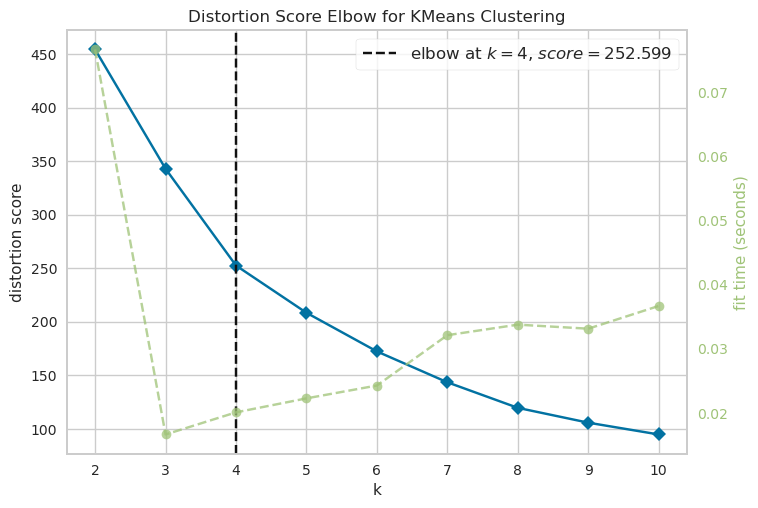

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [12]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

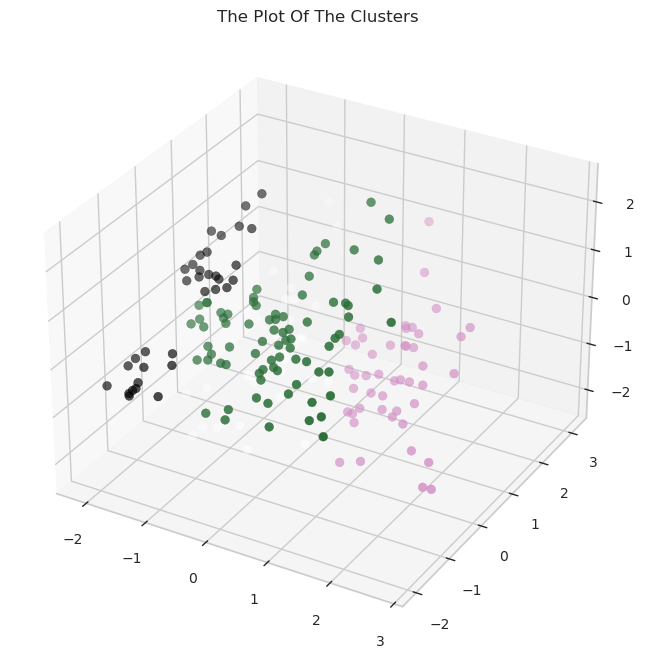

In [13]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = "cubehelix" )
ax.set_title("The Plot Of The Clusters")
plt.show()

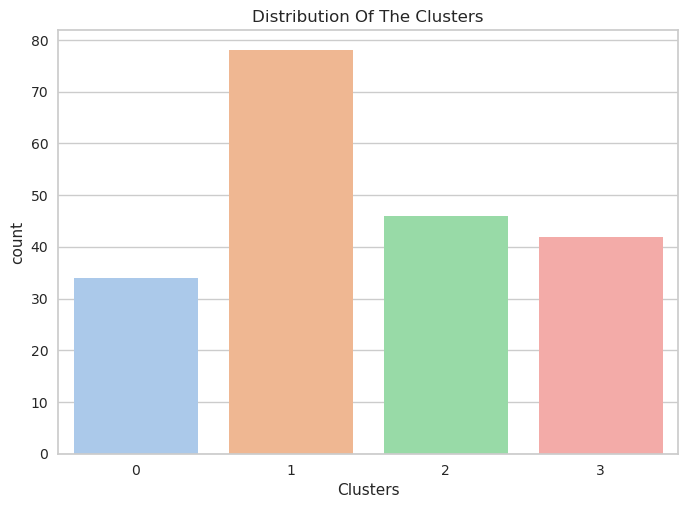

In [14]:
#Plotting countplot of clusters
pal = sns.color_palette("pastel")
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

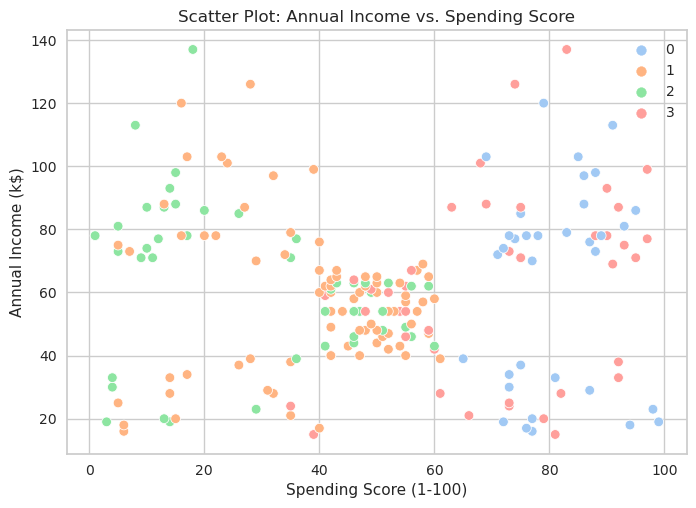

In [15]:
Title = "Scatter Plot: Annual Income vs. Spending Score"

pl = sns.scatterplot(data=data, x=data["Spending Score (1-100)"], y=data["Annual Income (k$)"], hue=data["Clusters"], palette=pal)
pl.set_title(Title)
plt.legend()
plt.show()

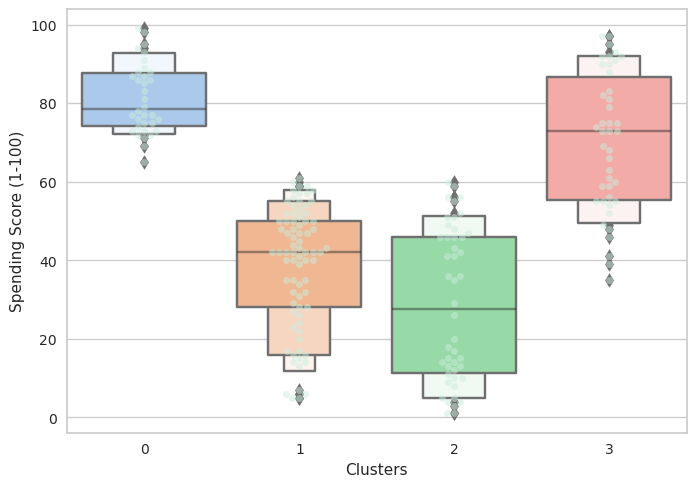

In [16]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Spending Score (1-100)"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Spending Score (1-100)"], palette=pal)
plt.show()

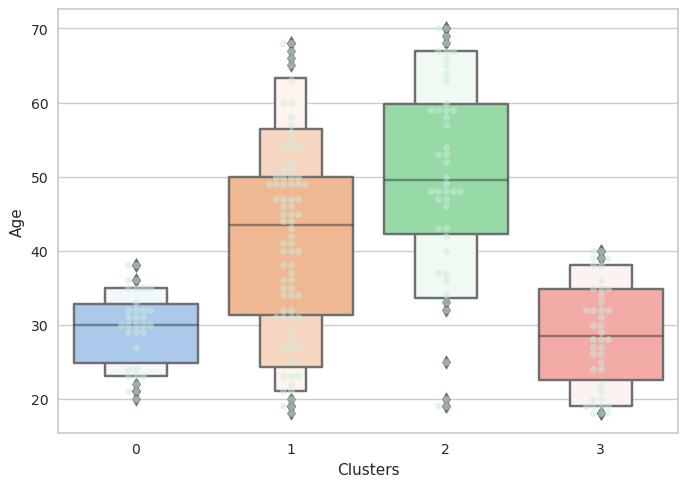

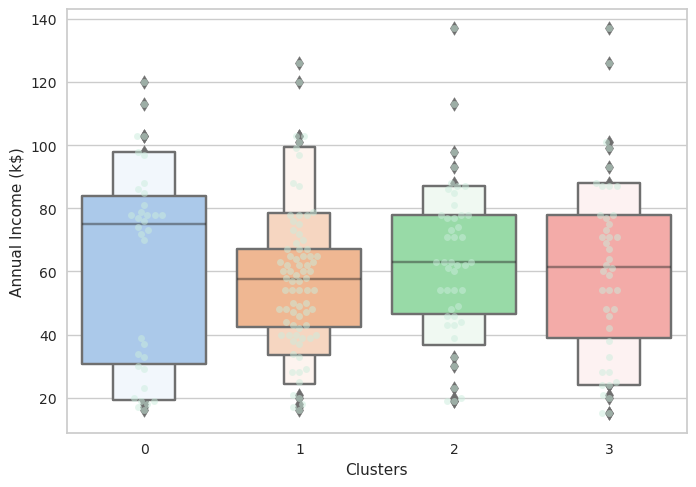

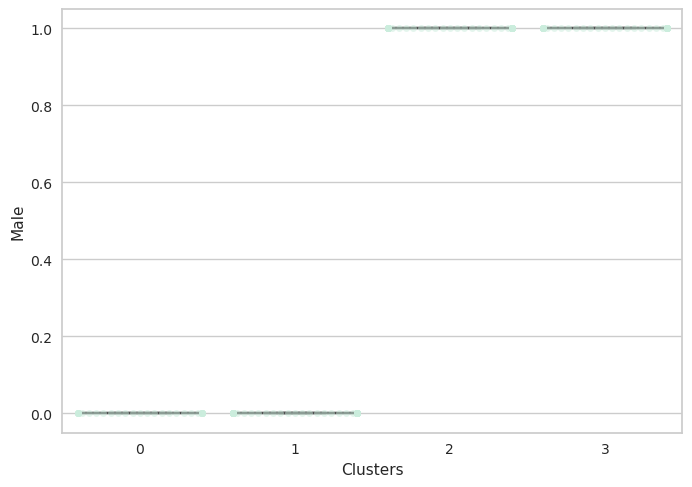

In [17]:
#Profiling

plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Age"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Age"], palette=pal)
plt.show()

plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Annual Income (k$)"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Annual Income (k$)"], palette=pal)
plt.show()
    

plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Male"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Male"], palette=pal)
plt.show()